# Stock data EDA

In [1]:
import os

import scipy
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
stock_list = os.listdir("./data/stocks")

# Number of available stocks

In [3]:
print(f"There are {len(stock_list)} tickers available")

There are 7195 tickers available


# Data length distribution
Compare the amount of available data per ticker

In [46]:
# load all stocks
# add columns for difference, percentage difference and scaled volume
all_stocks = []
not_found = []

for fn in stock_list:
    try:
        df = pd.read_csv("./data/stocks/" + fn)
        df['diff'] = df['Close'].diff()
        df['diff_pct'] = df['diff'] / (df['Close'] - df['diff'])
        df['scaledVolume'] = df['Volume'] / df['Volume'].max()
        df = df.drop(0)
        all_stocks.append(df)
    except (pd.errors.EmptyDataError, FileNotFoundError) as e:
        not_found.append(fn)

In [47]:
print(f"{len(all_stocks)} of tickers have data, {len(not_found)} are emtpty")

7163 of tickers have data, 32 are emtpty


In [48]:
lengths = [x.shape[0] for x in all_stocks]

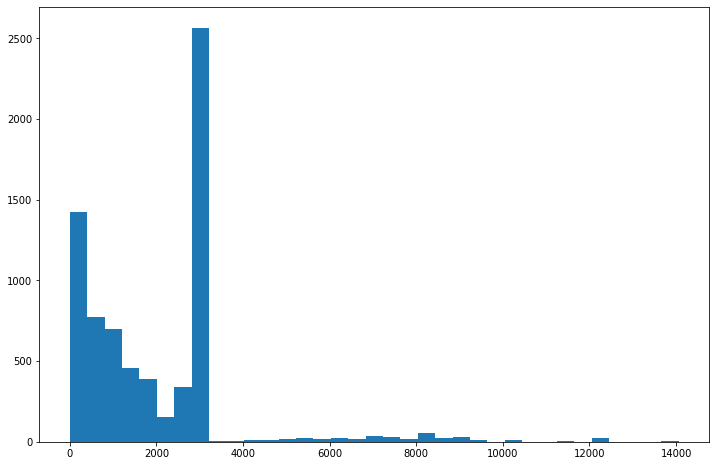

In [49]:
plt.figure(figsize=(12,8))
plt.hist(lengths, bins=35);

# Most common length of data
3201 data points with an occurrence of 1690

In [50]:
scipy.stats.mode(lengths)

ModeResult(mode=array([3200]), count=array([1690]))

In [51]:
print(f"In total, there are {np.sum(lengths)} data points in the set")

In total, there are 14880502 data points in the set


# Longest ticker data

In [52]:
print(f"Most data is available for ticker: {stock_list[np.argmax(lengths)]} with {np.max(lengths)} points")

Most data is available for ticker: ngl.us.txt with 14058 points


In [53]:
all_stocks[np.argmax(lengths)].head()

,Date,Open,High,Low,Close,Volume,OpenInt,diff,diff_pct,scaledVolume
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0,0.0585,0.009230,0.004212
2,1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0,-0.0668,-0.010444,0.003780
3,1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0,-0.1254,-0.019812,0.005292
4,1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0,-0.1171,-0.018875,0.007884
5,1962-01-09,6.1208,6.2376,6.1208,6.1621,592806,0,0.0751,0.012338,0.007128


### The NGL.US stock started in 1962

# Plot the NGL stock

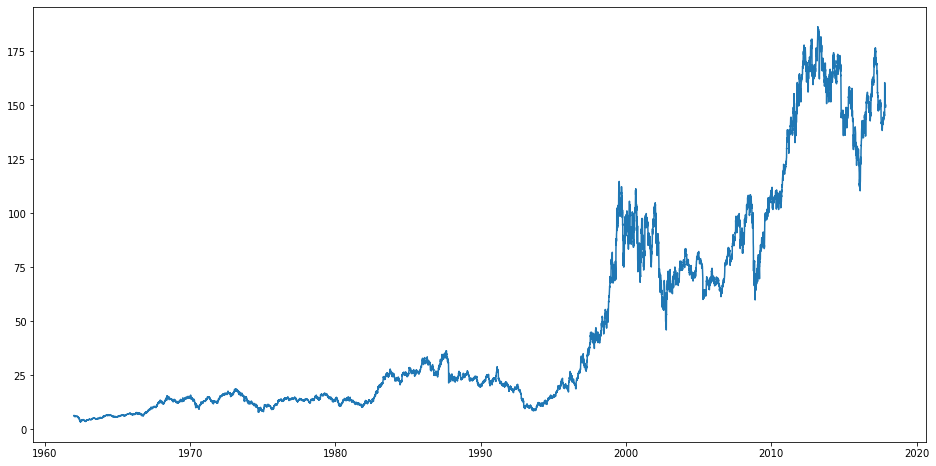

In [54]:
ngl = all_stocks[np.argmax(lengths)]
ngl['Date'] = pd.to_datetime(ngl['Date'])

plt.figure(figsize=(16,8))
plt.plot(ngl['Date'], ngl['Close'])

# Plot trading volume over time

In [55]:
full_set = pd.concat(all_stocks)

In [56]:
df = full_set

In [57]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df2 = df[df['Date'] >= '2016-01-01']

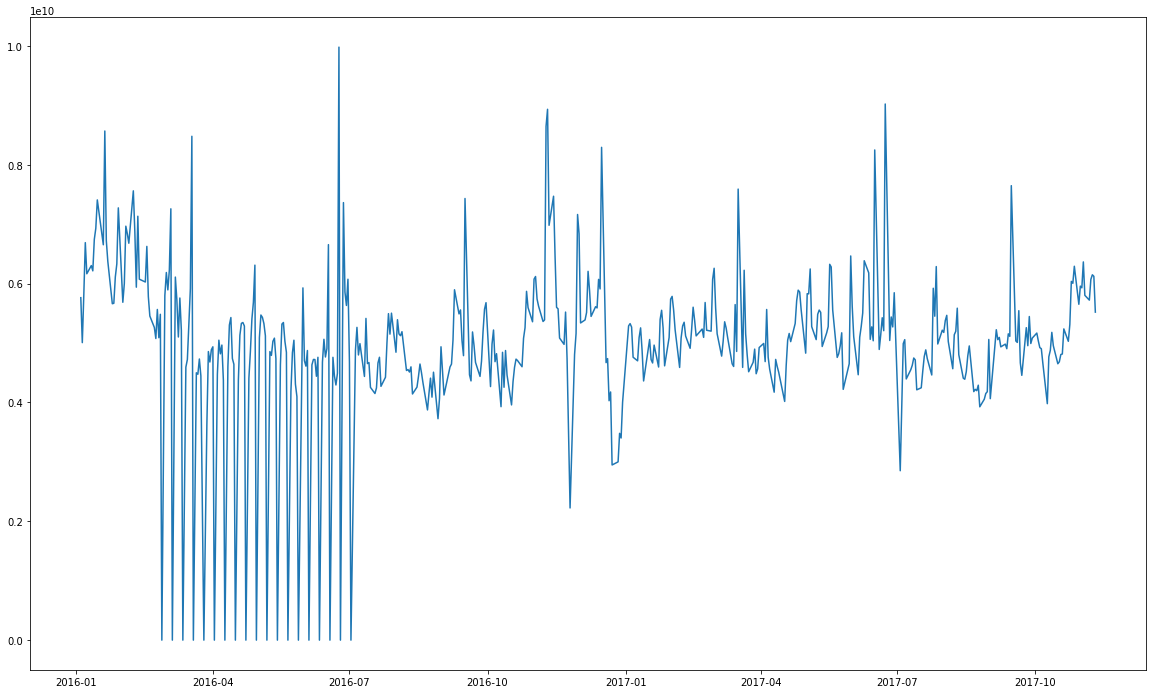

In [17]:
sub = df2.groupby("Date")['Volume'].sum()
plt.figure(figsize=(20,12))
plt.plot(sub.index, sub.values)

# Missing values

In [58]:
full_set.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
OpenInt         0
diff            0
diff_pct        0
scaledVolume    0
dtype: int64

In [59]:
full_set['dow'] = full_set['Date'].dt.dayofweek

# Diff / ratio

Text(0.5, 0, 'scaled volume (linear)')

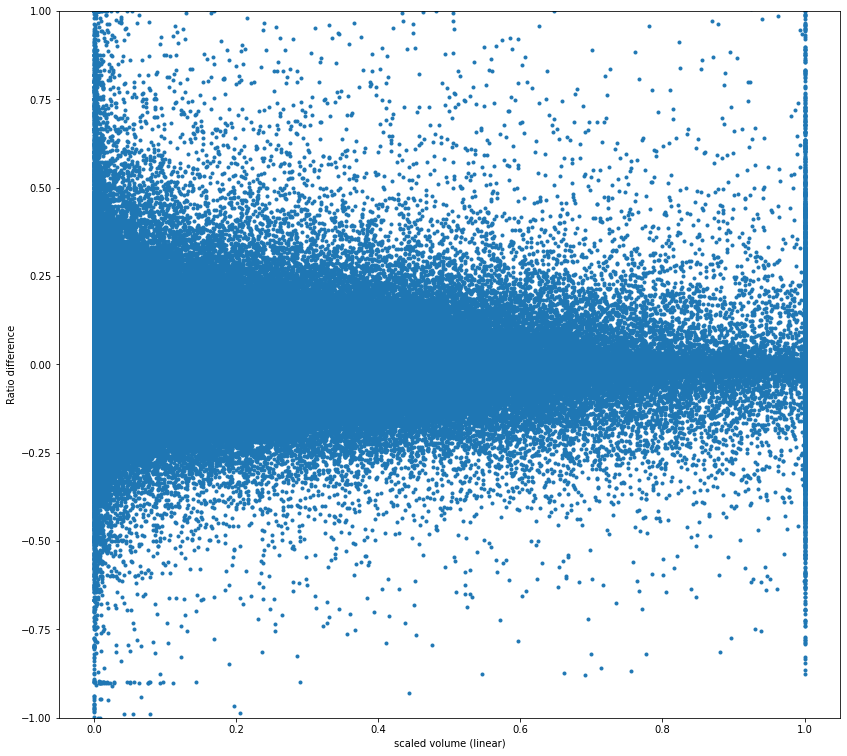

In [68]:
plt.figure(figsize=(14,13))
plt.ylim(-1,1)
plt.scatter(full_set['scaledVolume'], full_set['diff_pct'], marker=".")
plt.ylabel("Ratio difference")
plt.xlabel("scaled volume (linear)")

# Diff / frequency

<AxesSubplot:xlabel='difference ratio', ylabel='frequency'>

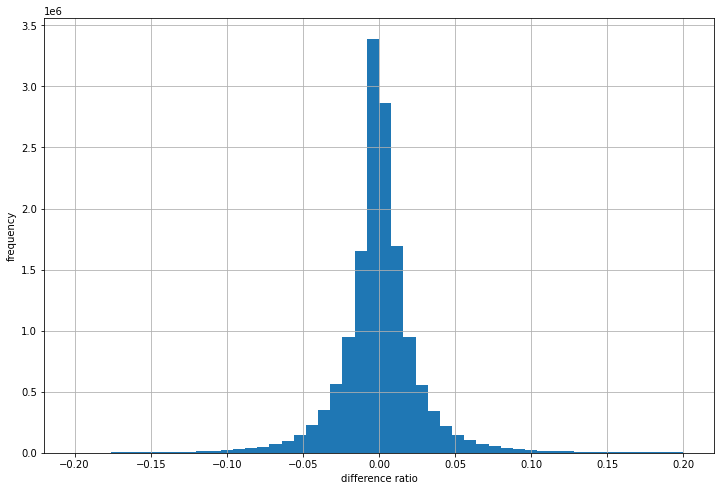

In [75]:
plt.figure(figsize=(12,8))
plt.ylabel("frequency")
plt.xlabel("difference ratio")
full_set[(full_set['diff_pct'] < 0.2) & (full_set['diff_pct'] > -0.2)]['diff_pct'].hist(bins=50)